In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta
from scipy.integrate import quad
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")

In [2]:
r_big = 5 # radius of a sphere
n_sim = 10000 # number of simulations, should be divisible by n_fol
eps = 1e-10 # for uniform distribution denominator

theta = 2
k = 2

n_fol = 10 # number of follicules

Simple funtion to draw simulations with fixed R

In [2]:
def analytical_pdf(r, r_big): 
    # analytical probability density function for apparent radius (basically, likelihood - f(r|R))
    """
    @r : set of r values
    @R : fixed R value
    @eps : small value for denominator
    """
    return r / (r_big * np.sqrt(r_big**2 - r**2) + 1e-10) # + 1e-10 for numerical stability

Function to run simulations of R (gamma distribution)

In [ ]:
# def sim_gamma(theta, k, n_fol):
#     # SIMULATIONS
#     r_big = np.random.gamma(shape = theta, scale = k, 
#     size = n_fol) # computation of prior (p(R))
#     plt.hist(r_big, bins = 50, density = True, alpha = 0.8,
#     color = "brown", label = "Simulation")

#     # ANALYTICS
#     x = np.linspace(0, np.max(r_big), 100)  # generate x values
#     x_dist = gamma.pdf(x, a = theta, scale = k)    # compute the PDF

#     # VISUALIZATION
#     plt.plot(x, x_dist, 
#     label = f'Theoretical PDF (θ={theta}, k={k})')
#     plt.title("Gamma Distribution Simulation")
#     plt.xlabel("X values")
#     plt.ylabel("Density")
#     plt.legend()

#     return plt

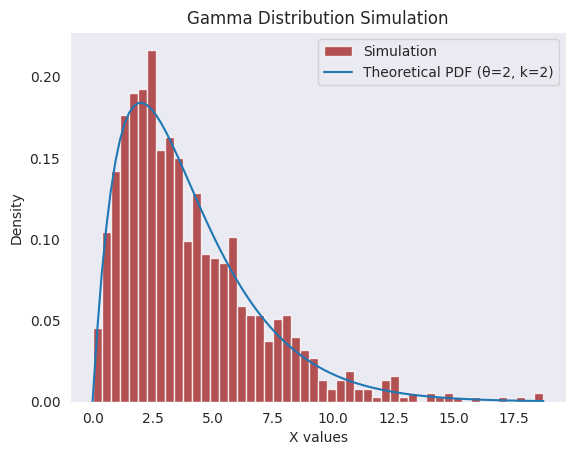

In [ ]:
# plt = sim_gamma(theta, k, 1000)
# plt.show()

In [6]:
def marginal_r(r, theta, k):
    integrand = lambda big_r: analytical_pdf(r, big_r, eps) * gamma.pdf(big_r, a = theta, scale = k)
    integral, _ = quad(integrand, r, np.inf) # constraint: r <= R
    return integral

In [ ]:
def sim_var_big_r(theta, k, n_sim, n_fol, plot = True):
    """ 
    Simulation of disections of r for each of {n_fol} follucules with radius R  
    distributed by a gamma law

    @theta {int} - shape of gamma distribution
    @k {int} - scale of gamma distribution
    @eps {eps} - small parameter for analytical_PDF denominator
    @n_sim {int} - number of simulations per follicle
    @n_fol {int} - number of follicles

    @analytical_pdf {fun} - calculation of analytical pdf based on r_set, R and eps 
    """
    r_set = None # set of disections' r
    r_big_set = np.random.gamma(shape = theta, scale = k, 
    size = n_fol) # set of follicules' radii, or our prior p(R)
    
    # SIMULATIONS
    for fol in range(n_fol):
        r_big = r_big_set[fol]
        d = np.random.uniform(low = 0, high = r_big, size = n_sim) # l from center of a sphere to the section
        r = np.sqrt(r_big**2 - d**2) # apparent radius, or raw r_small data

        if r_set is None:
            r_set = r # initialization of a first row if absent
        else:
            r_set = np.concatenate((r_set, r), axis = 0) # along rows

    r_grid = np.linspace(0, np.max(r_set), 100)
    
    # ITERATED ANALYTICS
    iter_analytical = np.zeros_like(r_grid)
    
    # for r_big in r_big_set:
    #     # Only consider r values less than R
    #     mask = r_grid < r_big
    #     # Probability density for a single follicle
    #     p_r = analytical_pdf(r_grid[mask], r_big)
    #     iter_analytical[mask] += p_r
     
    # # Normalize by number of follicles
    # iter_analytical /= n_fol

    # ANALYTICAL ANALYTICS
    # by formula p(r) = \int_R{p(r|R) * p(R)} = \int_R {analytical_PDF * gamma} 
    real_analytical = np.array([marginal_r(r, theta, k) for r in r_grid])

    # VISUALIZATION
    if plot == True:
        plt.hist(r_set, density = True, alpha = 0.8,
        color = 'brown', label = "Simulation", bins = 100)

        plt.plot(r_grid, iter_analytical, label = "Iterated PDF")
        plt.plot(r_grid, real_analytical, label = "Analytical PDF")

        # PLOT CUSTOMIZATION
        plt.xlabel("Apparent Radius")
        plt.ylabel("Density")
        plt.legend()
        plt.title("Distribution of Apparent Radius")

    return r_set

Function to run simulation of r varying of R (gamma)

In [143]:
n_sim = 1
n_fol = 10000

In [144]:
def gamma_shift(theta, k, eps, n_sim, n_fol):
    r_set = sim_var_big_r(theta, k, eps, n_sim, n_fol, plot = False)
    grid = np.linspace(0, np.max(r_set), 1000)

    # Gamma of R
    r_big_gamma = gamma.pdf(grid, a = theta, scale = k) # using the grid

    # Gamma fit of r
    a, _, scale = gamma.fit(r_set) # using the raw data
    r_gamma = gamma.pdf(grid, a = a, scale = scale) # reusing the grid

    # Difference Analysis
    print(f"Gamma of R: shape = {theta}, scale = {k}")
    print(f"Gamma fit of r: shape = {round(a, 2)}, 
          scale = {round(scale, 2)}")
    print()
    
    plt.plot(grid, r_big_gamma, label = "Gamma of R")
    plt.plot(grid, r_gamma, label = "Gamma of r")
    plt.ylabel("Density")
    plt.legend()
    plt.title("Shift of Gamma Distribution")

array([2.16509871, 2.1038695 , 3.04639715, ..., 5.46483992, 3.35938717,
       3.12673964], shape=(10000,))

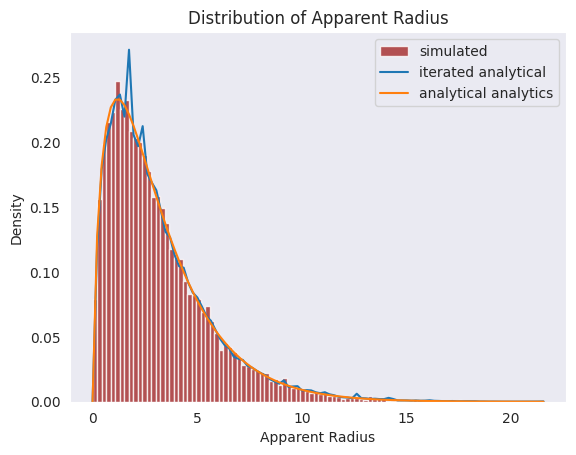

In [145]:
plt.close("all")
sim_var_big_r(theta, k, eps, n_sim, n_fol)

In [146]:
n_sim = 10
n_fol = 1000

array([2.20919488, 1.4292154 , 1.9167862 , ..., 4.377254  , 3.12566437,
       3.41144443], shape=(10000,))

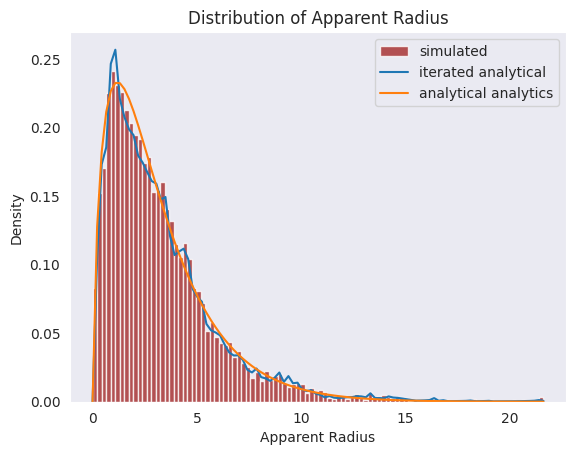

In [147]:
plt.close("all")
sim_var_big_r(theta, k, eps, n_sim, n_fol)

In [148]:
n_sim = 1
n_fol = 1000
theta = 2
k = 2

Gamma of R: shape = 2, scale = 2
Gamma fit of r: shape = 1.79, scale = 1.78



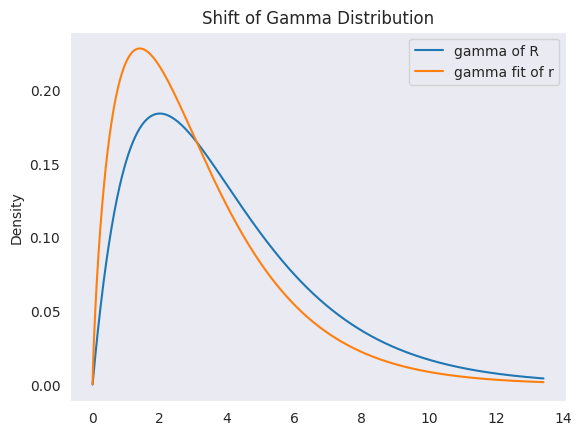

In [149]:
plt.close("all")
gamma_shift(theta, k, eps, n_sim, n_fol)

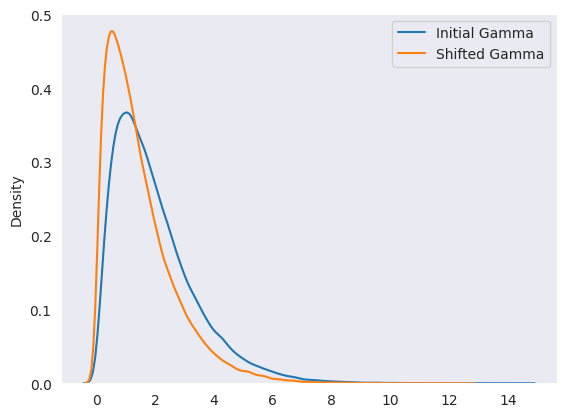

In [150]:
gamma_init_set = np.random.gamma(shape = 2, scale = 1, 
    size = 100000)
gamma_shift_set = np.random.gamma(shape = 1.53, scale = 0.98, size = 100000)

plt.close("all")
sns.kdeplot(gamma_init_set, label = "Initial Gamma")
sns.kdeplot(gamma_shift_set, label = "Shifted Gamma")
plt.legend()

In [151]:
n_sim = 10
n_fol = 100

array([ 1.18078873,  1.47056746,  1.44301417,  0.2370495 ,  1.19025911,
        1.02743573,  1.19673504,  1.46861691,  0.74127081,  0.89938117,
        5.32595995,  5.99808557,  5.98591711,  5.91734991,  3.18923944,
        5.84823622,  5.9980381 ,  1.93426453,  5.36494473,  4.55110862,
        0.05339356,  0.05844049,  0.03580711,  0.04054021,  0.05635589,
        0.04094989,  0.0232688 ,  0.02688917,  0.05984144,  0.0161104 ,
        4.12695192,  4.00014972,  4.26370104,  2.62159624,  4.40852295,
        3.84275578,  4.3246606 ,  3.03646521,  4.39630416,  4.27563991,
        3.18740525,  1.28758998,  3.38896646,  2.52719926,  1.55337535,
        2.28572554,  3.70725127,  2.32914571,  3.50043052,  2.18863401,
        2.90349524,  1.74423395,  3.8113307 ,  4.89037595,  4.11895746,
        4.91697535,  3.44498997,  5.26219561,  3.83274307,  5.06285383,
        1.23868312,  1.10131706,  1.89006823,  2.25190751,  2.2837937 ,
        2.07328186,  1.50489622,  2.17838156,  1.58320918,  2.28

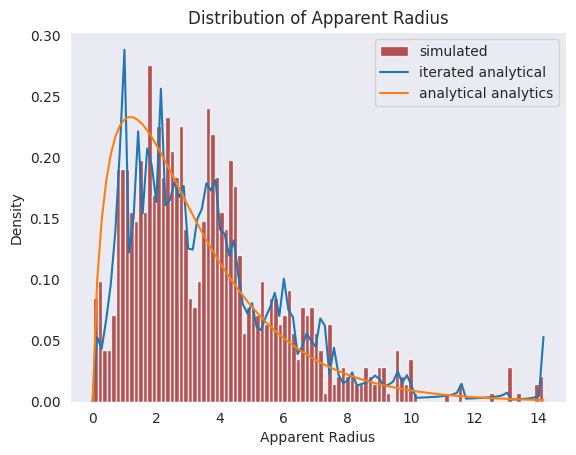

In [152]:
plt.close("all")
sim_var_big_r(theta, k, eps, n_sim, n_fol)
# plt.savefig("apparent_radius_follicules100.png")

In [153]:
n_fol = 1000
n_sim = 1
k_set = [0.5, 1, 1.5]
theta_set = [1, 2, 3]

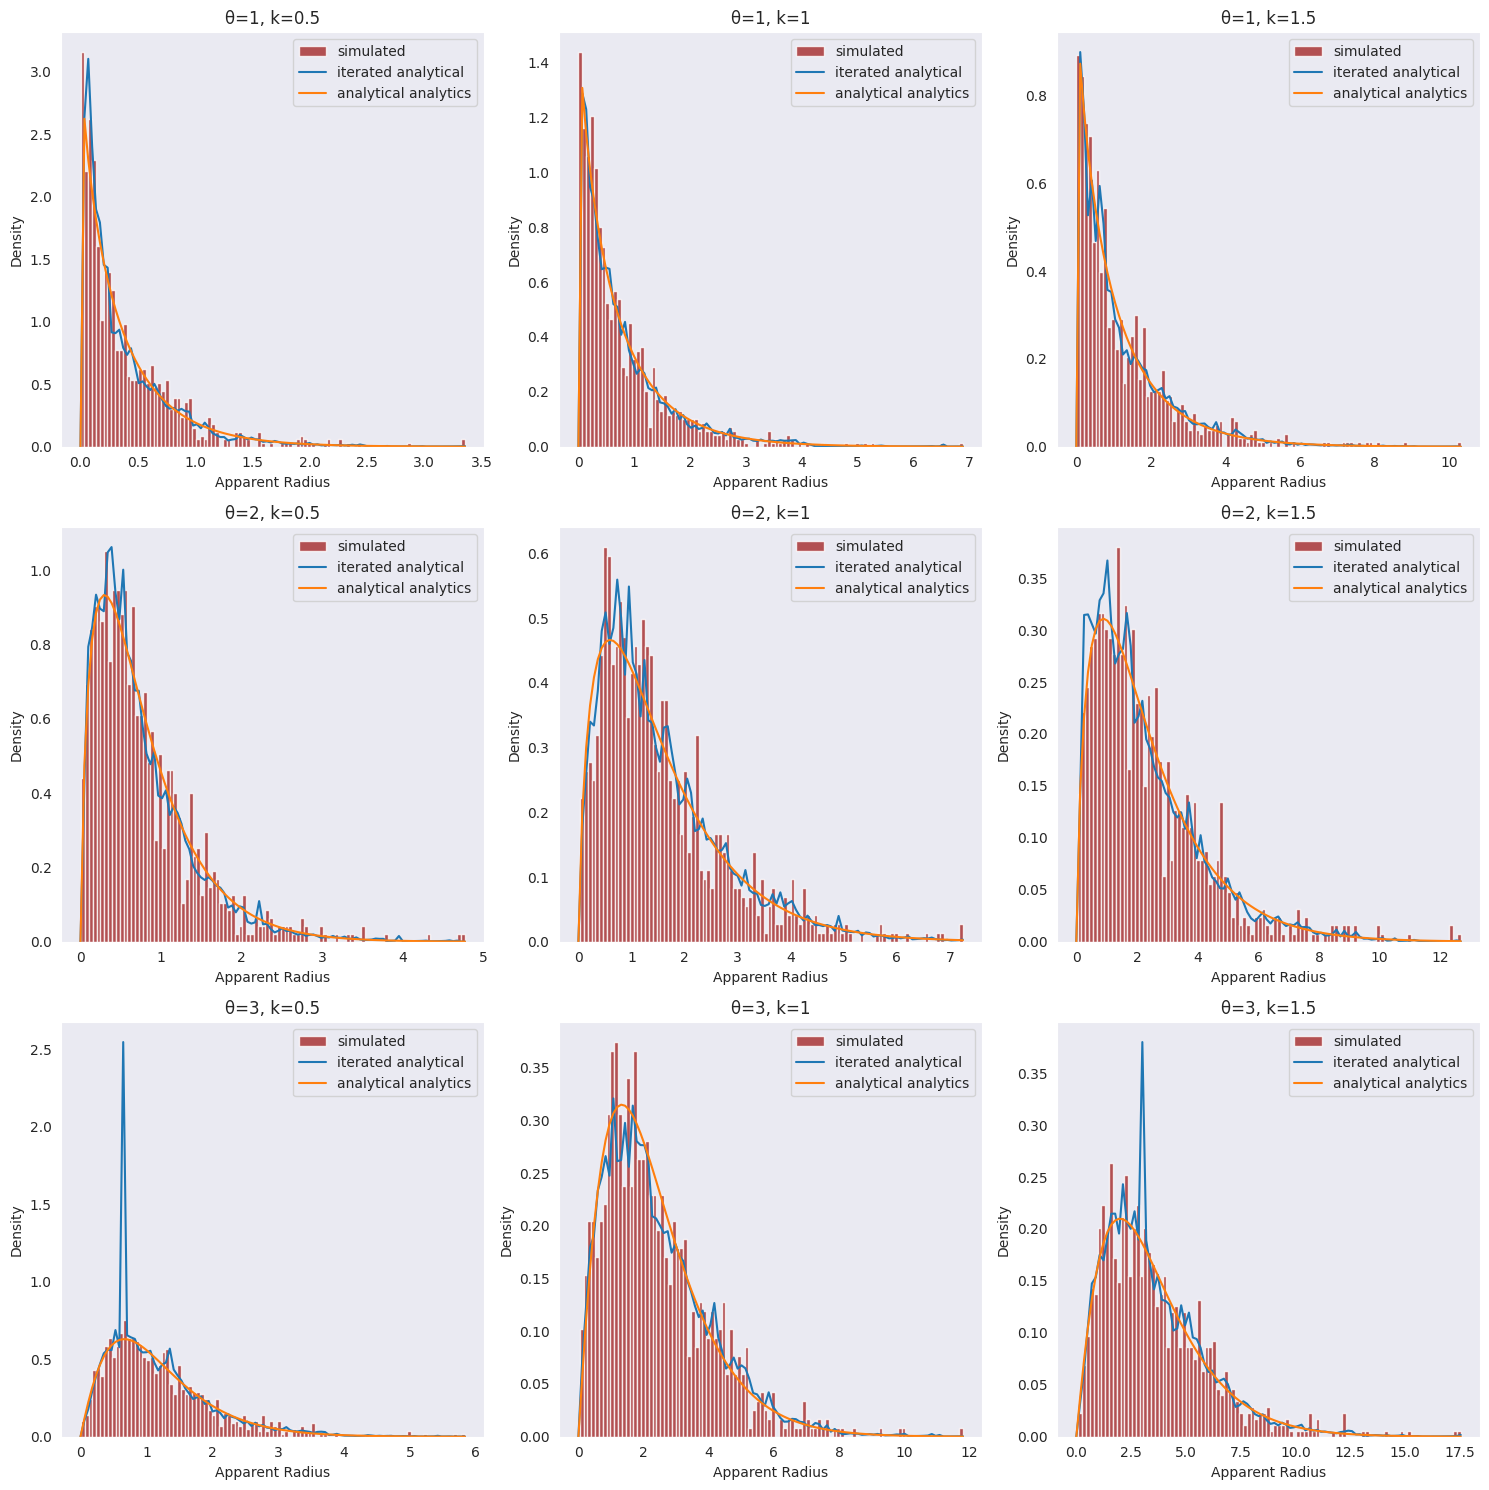

In [154]:
plt.close("all")
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
for i, theta in enumerate(theta_set):
    for j, k in enumerate(k_set):
        ax = axes[i, j]
        plt.sca(ax) # set current axis
        sim_var_big_r(theta, k, eps, n_sim, n_fol) # still returnes plt
        plt.title(f"θ={theta}, k={k}")

plt.tight_layout()
plt.savefig("apparent_radius_var.png")
plt.show()

Gamma of R: shape = 1, scale = 0.5
Gamma fit of r: shape = 0.83, scale = 0.47

Shift for θ=1, k=0.5
Gamma of R: shape = 1, scale = 1
Gamma fit of r: shape = 0.94, scale = 0.86

Shift for θ=1, k=1
Gamma of R: shape = 1, scale = 1.5
Gamma fit of r: shape = 0.95, scale = 1.14

Shift for θ=1, k=1.5
Gamma of R: shape = 2, scale = 0.5
Gamma fit of r: shape = 1.59, scale = 0.48

Shift for θ=2, k=0.5
Gamma of R: shape = 2, scale = 1
Gamma fit of r: shape = 1.55, scale = 1.0

Shift for θ=2, k=1
Gamma of R: shape = 2, scale = 1.5
Gamma fit of r: shape = 1.52, scale = 1.52

Shift for θ=2, k=1.5
Gamma of R: shape = 3, scale = 0.5
Gamma fit of r: shape = 2.31, scale = 0.51

Shift for θ=3, k=0.5
Gamma of R: shape = 3, scale = 1
Gamma fit of r: shape = 2.2, scale = 1.03

Shift for θ=3, k=1
Gamma of R: shape = 3, scale = 1.5
Gamma fit of r: shape = 2.16, scale = 1.62

Shift for θ=3, k=1.5


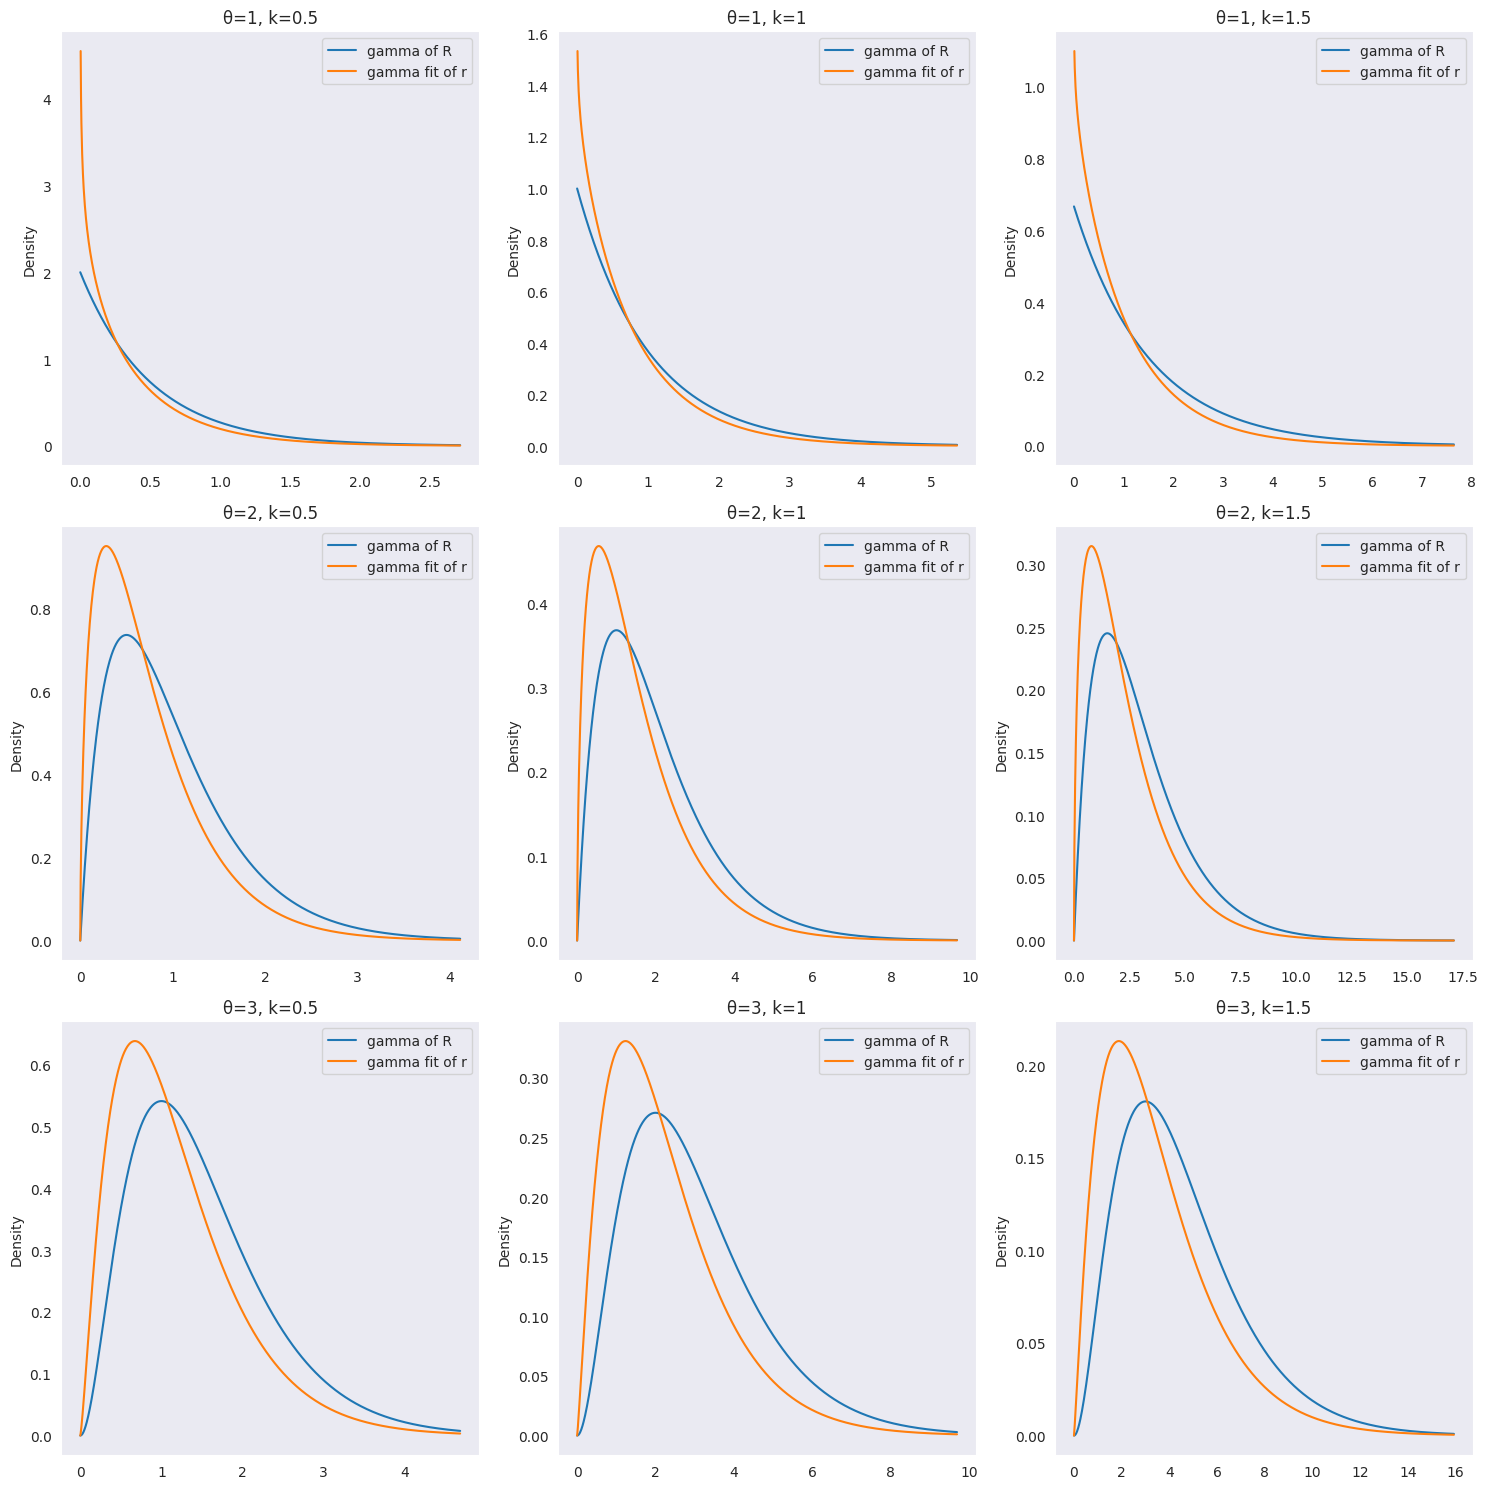

In [ ]:
plt.close("all")
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
for i, theta in enumerate(theta_set):
    for j, k in enumerate(k_set):
        ax = axes[i, j]
        plt.sca(ax) # set current axis
        gamma_shift(theta, k, eps, n_sim, n_fol) # still returnes plt
        plt.title(f"θ={theta}, k={k}")
        print(f"Shift for θ={theta}, k={k}")

plt.tight_layout()
plt.savefig("apparent_radius_var_shift.png")
plt.show()

Estimation of R

In [ ]:
def big_r_gamma_est(theta, k, n_sim, n_fol):
    r_set = sim_var_big_r(theta, k, n_sim, n_fol, plot = False)
    resized_r_set = r_set.reshape(-1, n_sim).mean(axis = 1)
    big_r_est = resized_r_set * 4 / np.pi # mean estimation of R
    theta_est, _, k_est = gamma.fit(big_r_est, floc = 0)
    
    print(f"Estimated theta: {round(theta_est, 3)}")
    print(f"Estimated k: {round(k_est, 3)}")
    print(f"Theta difference: {round(theta_est - theta, 3)}")
    print(f"K difference: {round(k_est - k, 3)}")

In [ ]:
def big_r_gamma_est_prime(theta, k, n_sim, n_fol):
    r_set = sim_var_big_r(theta, k, n_sim, n_fol, plot = False)
    resized_r_set = r_set.reshape(-1, n_sim).mean(axis = 1)
    theta_est, _, k_est = gamma.fit(resized_r_set)
    theta_prime = np.pi**2 * theta_est / (16 * (2 / 3 * (1 + theta_est) - np.pi**2 / 16 * theta_est))
    k_prime = (4 * k_est / np.pi) * (2 / 3 * (1 + theta_est) - np.pi**2 / 16 * theta_est )
    
    print(f"Estimated theta: {round(theta_prime, 3)}")
    print(f"Estimated k: {round(k_prime, 3)}")
    print(f"Theta difference: {round(theta_prime - theta, 3)}")
    print(f"K difference: {round(k_prime - k, 3)}")

In [228]:
theta = 2
k = 2
n_sim = 1
n_fol = 1000
big_r_gamma_est_prime(theta, k, eps, n_sim, n_fol)

Estimated theta: 1.318
Estimated k: 1.899
Theta difference: -0.682
K difference: -0.101


In [190]:
a_set = [0.5, 1, 1.5, 2, 2.5 ,3]
# for a_set we will choose scale = 2
scale_set = [0.5, 1, 3, 5, 7, 9, 11]
# for scale_set we will choose a = 2

In [191]:
def gamma_shift_prime(theta, k, eps, n_sim, n_fol):
    r_set = sim_var_big_r(theta, k, eps, n_sim, n_fol, plot = False)

    # Gamma fit of r
    a, _, scale = gamma.fit(r_set) # using the raw data
    return a, scale

In [199]:
a_set_prime = []
scale_set_prime = []
for i in a_set:
    for rep in range(10):
        a, scale = gamma_shift_prime(theta = i, k = 2, eps = eps, n_sim = 1, n_fol = 1000)
        a_set_prime.append(a)
        scale_set_prime.append(scale)
a_set_prime = np.array(a_set_prime).reshape(-1, 10).mean(axis = 1) # mean estimation of a based on 10 repetitions
scale_set_prime = np.array(scale_set_prime).reshape(-1, 10).mean(axis = 1) # mean estimation of a based on 10 repetitions

plt.close("all")

In [200]:
a_set_prime

array([0.47162334, 0.88775216, 1.28440386, 1.57524562, 1.91059866,
       2.26535292])

In [201]:
scale_set_prime

array([1.4989827 , 1.71788626, 1.80072834, 2.00076133, 2.0496217 ,
       2.08432958])

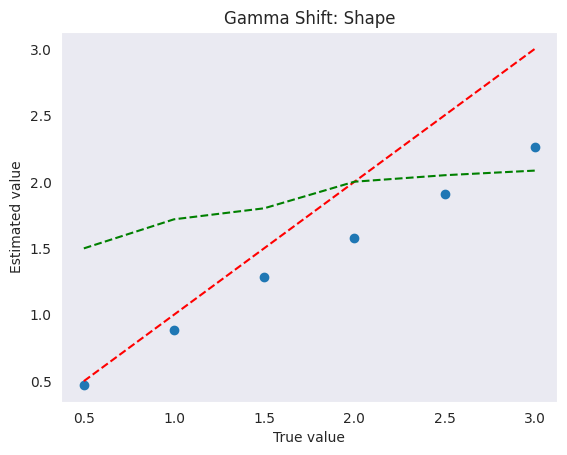

In [202]:
plt.scatter(a_set, a_set_prime)
plt.plot(a_set, a_set, color = 'red', linestyle = '--')
plt.plot(a_set, scale_set_prime, color = 'green', linestyle = '--')
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.title("Gamma Shift: Shape")
plt.show()

In [ ]:
a_set_prime = []
scale_set_prime = []
for i in scale_set:
    for rep in range(10):
        a, scale = gamma_shift_prime(theta = 2, k = i, eps = eps, n_sim = 1, n_fol = 1000)
        a_set_prime.append(a)
        scale_set_prime.append(scale)
a_set_prime = np.array(a_set_prime).reshape(-1, 10).mean(axis = 1) # mean estimation of a based on 10 repetitions
scale_set_prime = np.array(scale_set_prime).reshape(-1, 10).mean(axis = 1) # mean estimation of a based on 10 repetitions

plt.close("all")

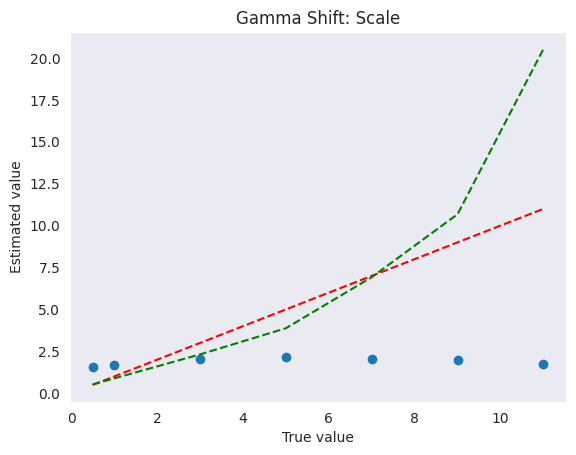

In [204]:
plt.scatter(scale_set, scale_set_prime)
plt.plot(scale_set, scale_set, color = 'red', linestyle = '--')
plt.plot(scale_set, a_set_prime, color = 'green', linestyle = '--')
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.title("Gamma Shift: Scale")
plt.show()